In [1]:
#d(ady/dx)dx+bdy/dx+cy=f(x) 
#Developed A PINN for solving a general 2nd order differential equation using Dirichlet boundary conditions

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [6]:
def a_x(x):
    return 1
def b_x(x):
    return 0
def c_x(x):
    return 0
def f_x(x):
    return 2

In [7]:
class Model(nn.Module):
    def __init__(self,input,output,h1):
        super().__init__()
        self.fc1=nn.Linear(input,h1)
        self.fc2=nn.Linear(h1,h1)
        self.fc4=nn.Linear(h1,h1)
        self.fc5=nn.Linear(h1,h1)
        self.fc6=nn.Linear(h1,h1)
        self.fc3=nn.Linear(h1,output)
    def forward(self,x):
        x=torch.tanh(self.fc1(x))
        x=torch.tanh(self.fc2(x))
        x=torch.tanh(self.fc4(x))
        x=torch.tanh(self.fc5(x))
        x=torch.tanh(self.fc6(x))
        x=self.fc3(x)
        return x
        

In [8]:
x = torch.linspace(0,1,500).reshape(-1,1).requires_grad_(True)
fx=f_x(x)
ax=a_x(x)
bx=b_x(x)
cx=c_x(x)


In [10]:
#fx = f_x(x).detach()
#Add this if the expression contain x. Add syntax for a(x),b(x),c(x)

In [11]:
torch.manual_seed(14)
model=Model(1,1,40)
optimizer=torch.optim.Adam(model.parameters(),lr=1e-4)

In [12]:
epochs=30000
loss_history=[]
for i in range(epochs):
    optimizer.zero_grad()
    ypred1=model(torch.zeros((1,1)))
    loss1=1*torch.mean((ypred1-0)**2)
    ypred2=model(torch.ones((1,1)))
    loss2=1*torch.mean((ypred2-0)**2)
    ypred3=model(x)
    dy_dx = torch.autograd.grad(ypred3, x, torch.ones_like(ypred3), create_graph=True)[0]
    a_dy_dx=ax*dy_dx
    a_d2y_dx2 = torch.autograd.grad(a_dy_dx, x, torch.ones_like(a_dy_dx), create_graph=True)[0]
    F=-a_d2y_dx2+bx*dy_dx+cx*ypred3-fx
    loss3=1*torch.mean((F-0)**2)
    loss=loss1+loss2+loss3
    loss.backward()
    optimizer.step()
    loss_history.append(loss.detach().numpy())

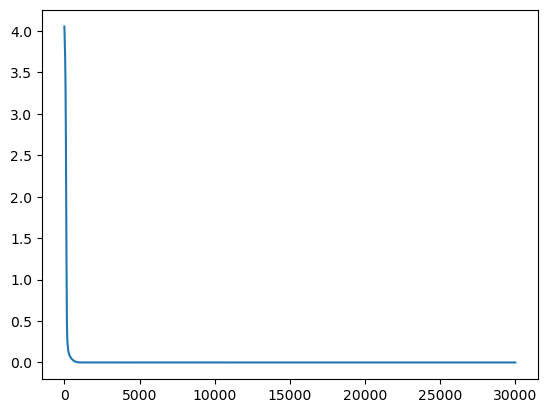

In [13]:
plt.plot(range(epochs),loss_history)


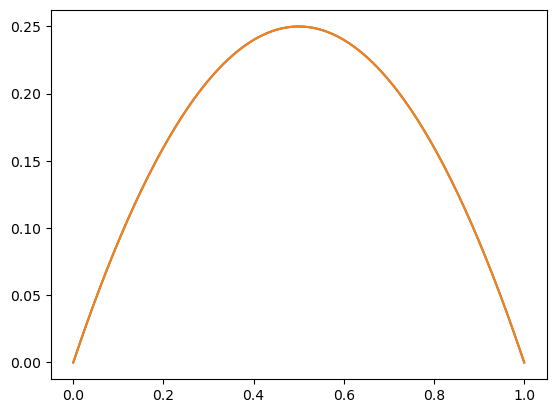

In [16]:
with torch.no_grad():
    def y_stable(x):
        return x*(1-x)
    x= np.linspace(0,1,200).reshape(-1, 1)  

    plt.plot(x,y_stable(x))
    x=torch.FloatTensor(x)
    ypred=model.forward(x)
    plt.plot(x,ypred)
    
   